# **Processamento de Imagens e Imagens**
Engenharia da Computação - 2021.01

## Segmentação com GrabCut

### Download das imagens de teste

### Imports

In [76]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### Code

In [77]:
img1 = cv.imread('drive/MyDrive/Colab Notebooks/College/Signal-Image-Processing/image_dataset_publico/estatua.jpg')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)

In [78]:
# Retangulo de Segmentacao
img2 = img1.copy()
p1 = (120, 100)
p2 = (350, 350)
img2 = cv.rectangle(img2, p1, p2, (255, 0, 0), 2)

# Parametros
mascara = np.zeros(img1.shape[:2], np.uint8)    # receber o resultado do algoritmo
bgModel = np.zeros((1, 65), np.float64)         # modelo background
fgModel = np.zeros((1, 65), np.float64)         # modelo do foreground
retangulo = p1 + p2

# Aplicar o Algoritmo GRABCUT
# cv.GC_INIT_WITH_RECT = retangulo de segmentacao
# cv.GC_INIT_WITH_MASK = pixels de segmentacao informados pelo usuario
cv.grabCut(img1, mascara, retangulo, bgModel, fgModel, 5, cv.GC_INIT_WITH_RECT)

# Separar o Background do Foreground
# Apos a execucao do algoritmo, a variavel mascara contém valores entre 0 e 3
# Os valores iguais a 0 (zero) ou 2 (dois) representam o Background
# Os valores iguais a 1 (um) ou 3 (três) representam o Foreground

# Filtrar os pixels de background
filtro = np.where( (mascara == 0) | (mascara == 2), 0, 1).astype('uint8')
img3 = img1.copy()
img3 = img3 * filtro[:, :, np.newaxis]

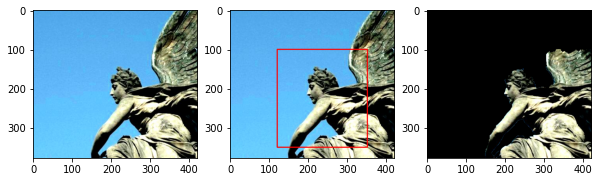

In [79]:
plt.figure(figsize=(10, 10))
plt.subplot(131), plt.imshow(img1)
plt.subplot(132), plt.imshow(img2)
plt.subplot(133), plt.imshow(img3)
plt.show()

### Exercises

#### Imports

#### Code